In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage

### Mask green colors

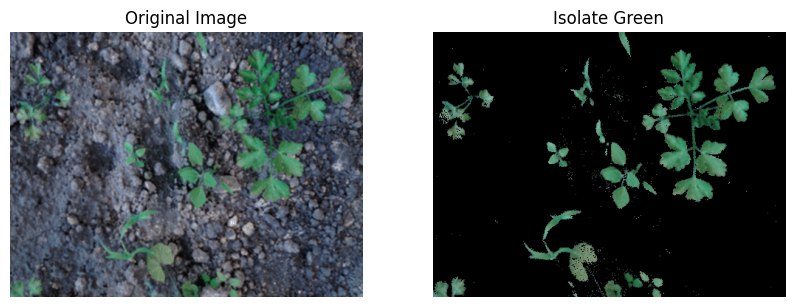

In [2]:
# Read the image
image = cv2.imread('img/img1.png')

# Convert the image from BGR to HSV color space
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for the green color in HSV
lower_green = np.array([30,40,30])
upper_green = np.array([100,255,255])

# Create a mask to isolate the green areas
mask = cv2.inRange(rgb_image, lower_green, upper_green)

# Apply the mask to the original image
green_areas = cv2.bitwise_and(image, image, mask=mask)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the original
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Plot masked
axs[1].imshow(green_areas)
axs[1].set_title('Isolate Green')
axs[1].axis('off')

plt.show()

### Apply Normalized Cut

In [3]:
slic = skimage.segmentation.slic(green_areas, compactness=70, n_segments= 800, start_label=1)
g = skimage.graph.rag_mean_color(green_areas, slic, mode = 'similarity')
ncut = skimage.graph.cut_normalized(slic,g)

print(f"Shape of image was ({green_areas.shape})")

Shape of image was ((360, 478, 3))


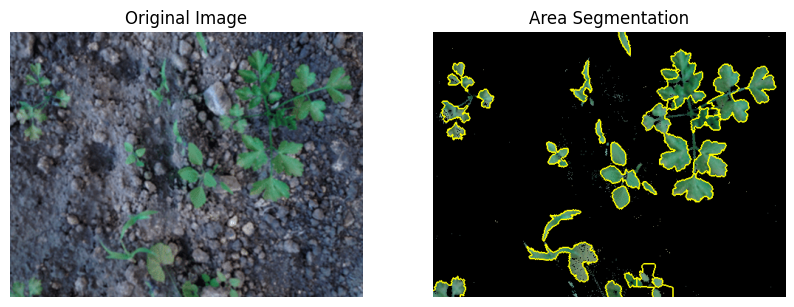

In [4]:
marking = skimage.segmentation.mark_boundaries(green_areas,ncut)
ncut_green = np.uint8(marking*255.0)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot the original
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Plot masked
axs[1].imshow(ncut_green)
axs[1].set_title('Area Segmentation')
axs[1].axis('off')

plt.show()


32 different areas identified


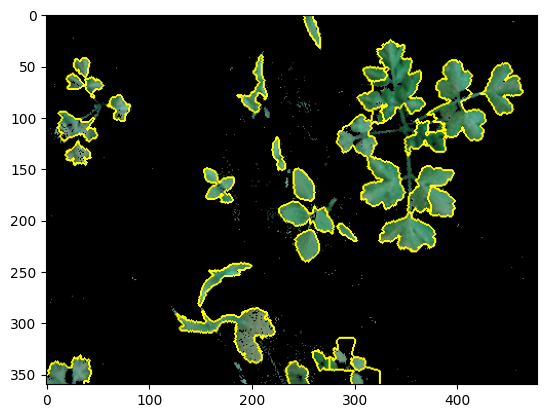

In [5]:
print(f"{np.unique(ncut).size} different areas identified")
plt.imshow(marking)
plt.show()

Output of ncut is a m x n array with same size as input image, each unique area is labeled with its corresponding area ID.


In [6]:
print(ncut[0])

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 18 18 18 18 18 18 18 18  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

This is the first row of ncut, the pixels labeled 18 belongs to area 18  
### Reflection

Maybe we can use the output to then group clusters of numbers and find the center point? Or what if we just ran a clustering algorithm after masking the green?